Constrained programming(Cp) is used when the constraints of your problem are more important than the objective function.


in this case, the solver will be more concerned with the physical domain of the solutions than the objective function itself.

Of course, you can minimize or maximize objective function in the cp. However, constrained programming will be better than other approach.

#two case where CP can be better than the other approach.

First, if the constraint of your problem are so tight that they will lead very close to the best solution in this case, CP will be preferred.

This can be true in scheduling problems, for example.

2nd, if your problem has many solutions that has the same value of the objective function, this can be true in some routing problems.

In this case, CP can be also a very good choice.

#Tools


 we will use ortools because he has a very good SEPI solver for us to start with.

#Problem 1

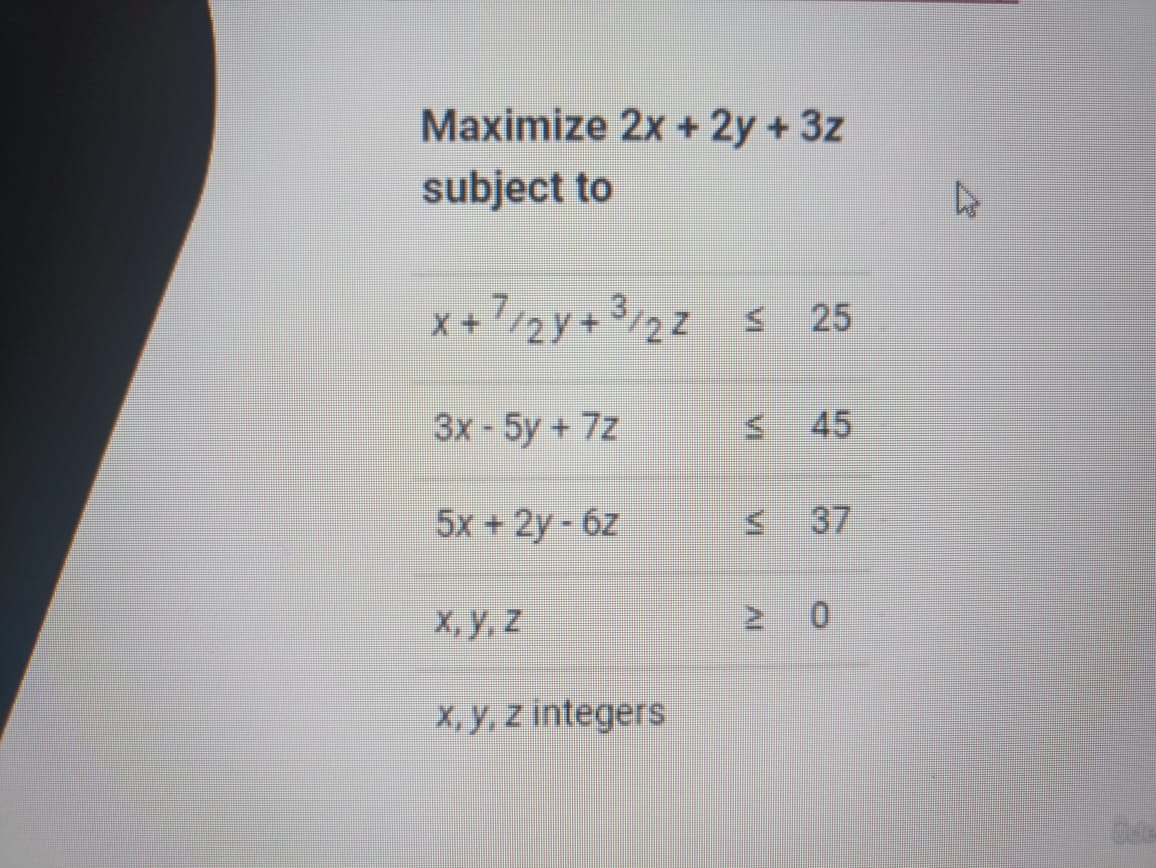

An important observation here is that in your tools requires only integers coefficients, so note that here we have seven divided by two and three divided by two. So I am going to make it a st line formula

In [ ]:
!pip install ortools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 22.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3


In [ ]:
from ortools.sat.python import cp_model

class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""

    def __init__(self, variables):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0

    def on_solution_callback(self):
        self.__solution_count += 1
        for v in self.__variables:
            print('%s=%i' % (v, self.Value(v)), end=' ')
        print()

    def solution_count(self):
        return self.__solution_count

model = cp_model.CpModel()
#1
x = model.NewIntVar(0, 1000, 'x') #upper limit was not defined that is why using a rando high value
y = model.NewIntVar(0, 1000, 'y')
z = model.NewIntVar(0, 1000, 'z')
#2
model.Add(2*x+7*y+3*z<=50)
model.Add(3*x-5*y+7*z<=45)
model.Add(5*x+2*y-6*z<=37)
model.Add(x+y+z>=10)

#3
#model.Maximize(2*x+2*y+3*z) #in Cp it is not mandatory!
#4
solver = cp_model.CpSolver()
status = solver.Solve(model)


print('Status =', solver.StatusName(status))
print('FO =', solver.ObjectiveValue())
print('x =', solver.Value(x))
print('y =', solver.Value(y))
print('z =', solver.Value(z))

#for print all the values
solution_printer = VarArraySolutionPrinter([x, y, z])
status = solver.SearchForAllSolutions(model, solution_printer)

Status = OPTIMAL
FO = 0.0
x = 0
y = 5
z = 5
x=0 y=5 z=5 
x=0 y=4 z=6 
x=0 y=4 z=7 
x=0 y=3 z=7 
x=0 y=3 z=8 
x=1 y=2 z=7 
x=1 y=3 z=8 
x=2 y=2 z=7 
x=3 y=2 z=6 
x=1 y=3 z=7 
x=4 y=1 z=5 
x=8 y=1 z=1 
x=7 y=2 z=1 
x=4 y=6 z=0 
x=5 y=5 z=0 
x=6 y=3 z=1 
x=7 y=3 z=1 
x=5 y=4 z=1 
x=5 y=5 z=1 
x=4 y=5 z=1 
x=6 y=4 z=1 
x=6 y=5 z=1 
x=7 y=4 z=1 
x=8 y=0 z=2 
x=9 y=0 z=2 
x=7 y=1 z=2 
x=8 y=1 z=2 
x=9 y=1 z=2 
x=6 y=2 z=2 
x=7 y=2 z=2 
x=8 y=2 z=2 
x=9 y=2 z=2 
x=5 y=3 z=2 
x=6 y=3 z=2 
x=7 y=3 z=2 
x=8 y=3 z=2 
x=1 y=5 z=4 
x=2 y=5 z=3 
x=5 y=1 z=5 
x=2 y=2 z=6 
x=7 y=0 z=3 
x=8 y=0 z=3 
x=4 y=4 z=2 
x=4 y=5 z=2 
x=3 y=5 z=2 
x=5 y=4 z=2 
x=6 y=4 z=2 
x=7 y=4 z=2 
x=8 y=4 z=2 
x=6 y=1 z=3 
x=7 y=1 z=3 
x=8 y=1 z=3 
x=9 y=1 z=3 
x=5 y=2 z=3 
x=6 y=2 z=3 
x=7 y=2 z=3 
x=8 y=2 z=3 
x=9 y=2 z=3 
x=10 y=2 z=3 
x=4 y=3 z=3 
x=5 y=3 z=3 
x=6 y=3 z=3 
x=7 y=3 z=3 
x=3 y=2 z=5 
x=8 y=3 z=3 
x=4 y=2 z=4 
x=4 y=2 z=5 
x=4 y=2 z=6 
x=5 y=1 z=4 
x=5 y=2 z=4 
x=5 y=2 z=5 
x=6 y=1 z=4 
x=7 y=1 z=4 
x=6 y=